In [1]:
import os, getpass

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

_set_env("GROQ_API_KEY")

In [2]:
_set_env("LANGSMITH_API_KEY")
os.environ["LANGSMITH_TRACING"] = "true"
os.environ["LANGSMITH_PROJECT"] = "langchain-academy"

In [16]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage
messages = [AIMessage(f"So you said you wanted to know about Fifa World Cup 2026?", name="Bot")]
messages.append(HumanMessage(f"Yes. But what do you think are important information to know?", name="Rao")) # type: ignore

for m in messages:
    m.pretty_print()


================================== Ai Message ==================================
Name: Bot

So you said you wanted to know about Fifa World Cup 2026?
================================ Human Message =================================
Name: Rao

Yes. But what do you think are important information to know?


In [17]:
import os, getpass
from langchain_groq import ChatGroq

import os, getpass

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

_set_env("GROQ_API_KEY")

from langchain_groq import ChatGroq
llm = ChatGroq(model="openai/gpt-oss-20b")
llm.invoke(messages)

AIMessage(content='Below is a “quick‑reference” guide to everything you’ll want to know about the 2026 FIFA\u202fWorld\u202fCup.  It covers the basic facts, the new format, the host‑country details, how teams qualify, where and when the matches will take place, and a few practical tips for fans.\n\n---\n\n## 1️⃣  Overview\n\n| Item | Details |\n|------|---------|\n| Edition | 23rd FIFA World Cup |\n| Host countries | United States, Canada, Mexico (joint host) |\n| Dates | 10\u202fJuly\u202f–\u202f12\u202fAugust\u202f2026 (exact dates still to be confirmed) |\n| Total teams | 48 (up from 32 in 2018 & 2022) |\n| Venues | 16 stadiums (12 in the U.S., 2 in Canada, 2 in Mexico) |\n| Group stage | 12 groups of 4 teams |\n| Knock‑out stage | 32 teams (top 2 from each group + 8 best third‑placed teams) |\n| Final | 12\u202fAugust\u202f2026 (venue to be announced) |\n\n---\n\n## 2️⃣  Host‑Country & Venue Snapshot\n\n| Country | Cities | Stadiums (capacity) | Notes |\n|---------|--------|-------

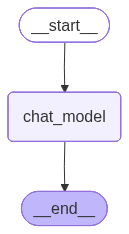

In [18]:
from IPython.display import Image, display
from langgraph.graph import MessagesState
from langgraph.graph import StateGraph, START, END

# Node 
def chat_model_node(state: MessagesState):
    return {"messages": llm.invoke(state["messages"])}

# Build graph
builder = StateGraph(MessagesState)
builder.add_node("chat_model", chat_model_node)
builder.add_edge(START, "chat_model")
builder.add_edge("chat_model", END)
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
output = graph.invoke({'messages': messages}) # type: ignore
for m in output['messages']:
    m.pretty_print()

================================== Ai Message ==================================
Name: Bot

So you said you wanted to know about Fifa World Cup 2026?
================================ Human Message =================================
Name: Rao

Yes. But what do you think are important information to know?
================================== Ai Message ==================================

### Quick‑Take: FIFA World Cup 2026

| Item | Key Details |
|------|-------------|
| **When** | 8–31 June 2026 (35‑day tournament) |
| **Where** | 16 host nations across **North America**: **United States, Canada, Mexico** |
| **Venues** | 16 stadiums (10 U.S., 4 Canada, 2 Mexico) – all pre‑existing, with upgrades for the event |
| **Teams** | 48 national squads (up from 32 in 2018/2022) |
| **Format** | 12 groups of 4 → top 2 advance → knockout rounds (Round of 32 → 16 → 8 → 4 → 2) |
| **Qualification** | 31‑team CONCACAF, 16‑team CONMEBOL, 10‑team UEFA, 3‑team AFC, 2‑team CAF, 2‑team OFC |
| **Economic Im

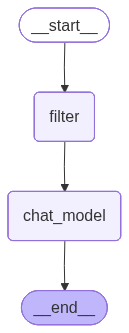

In [ ]:
from langchain_core.messages import RemoveMessage

# Nodes
def filter_messages(state: MessagesState):
    # Delete all but the 2 most recent messages
    delete_messages = [RemoveMessage(id=m.id) for m in state["messages"][:-2]] # type: ignore
    return {"messages": delete_messages}

def chat_model_node(state: MessagesState):    
    return {"messages": [llm.invoke(state["messages"])]}

# Build graph
builder = StateGraph(MessagesState)
builder.add_node("filter", filter_messages)
builder.add_node("chat_model", chat_model_node)
builder.add_edge(START, "filter")
builder.add_edge("filter", "chat_model")
builder.add_edge("chat_model", END)
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
# Message list with a preamble
messages = [AIMessage("Hi.", name="Bot", id="1")]
messages.append(HumanMessage("Hi.", name="Rao", id="2")) # type: ignore
messages.append(AIMessage("So you said you wanted to know about Fifa World Cup 2026?", name="Bot", id="3"))
messages.append(HumanMessage("Yes. But what do you think are important information to know?", name="Rao", id="4")) # type: ignore

# Invoke
output = graph.invoke({'messages': messages}) # type: ignore
for m in output['messages']:
    m.pretty_print()

================================== Ai Message ==================================
Name: Bot

So you said you wanted to know about Fifa World Cup 2026?
================================ Human Message =================================
Name: Rao

Yes. But what do you think are important information to know?
================================== Ai Message ==================================

Here’s a quick “cheat‑sheet” of the most important facts about the 2026 FIFA World Cup—so you’ll know what to look out for and why it’s such a big deal.

| Topic | Key Points |
|-------|------------|
| **When & Where** | • **Dates:** 10 June – 12 July 2026 (summer in North America)  <br>• **Host nations:** United States, Canada, Mexico (joint bid) |
| **Format & Teams** | • **48 teams** (up from 32) <br>• **Group stage:** 16 groups of 3 teams each – every team plays 2 matches (no “bye” week). <br>• **Knockout phase:** Top‑2 from each group → Round of 32, then 16, quarter‑finals, semi‑finals, and final. |
| 

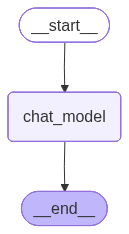

In [23]:
# Node
def chat_model_node(state: MessagesState):
    return {"messages": [llm.invoke(state["messages"][-1:])]}

# Build graph
builder = StateGraph(MessagesState)
builder.add_node("chat_model", chat_model_node)
builder.add_edge(START, "chat_model")
builder.add_edge("chat_model", END)
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
messages.append(output['messages'][-1])
messages.append(HumanMessage(f"Tell me more about structure of the Fifa World Cup 2026!", name="Rao")) # type: ignore

In [ ]:
for m in messages:
    m.pretty_print()

================================== Ai Message ==================================
Name: Bot

Hi.
================================ Human Message =================================
Name: Rao

Hi.
================================== Ai Message ==================================
Name: Bot

So you said you wanted to know about Fifa World Cup 2026?
================================ Human Message =================================
Name: Rao

Yes. But what do you think are important information to know?
================================== Ai Message ==================================

Here’s a quick “cheat‑sheet” of the most important facts about the 2026 FIFA World Cup—so you’ll know what to look out for and why it’s such a big deal.

| Topic | Key Points |
|-------|------------|
| **When & Where** | • **Dates:** 10 June – 12 July 2026 (summer in North America)  <br>• **Host nations:** United States, Canada, Mexico (joint bid) |
| **Format & Teams** | • **48 teams** (up from 32) <br>• **Group stage

In [29]:
# Invoke, using message filtering
output = graph.invoke({'messages': messages}) # type: ignore
for m in output['messages']:
    m.pretty_print()

================================== Ai Message ==================================
Name: Bot

Hi.
================================ Human Message =================================
Name: Rao

Hi.
================================== Ai Message ==================================
Name: Bot

So you said you wanted to know about Fifa World Cup 2026?
================================ Human Message =================================
Name: Rao

Yes. But what do you think are important information to know?
================================== Ai Message ==================================

Here’s a quick “cheat‑sheet” of the most important facts about the 2026 FIFA World Cup—so you’ll know what to look out for and why it’s such a big deal.

| Topic | Key Points |
|-------|------------|
| **When & Where** | • **Dates:** 10 June – 12 July 2026 (summer in North America)  <br>• **Host nations:** United States, Canada, Mexico (joint bid) |
| **Format & Teams** | • **48 teams** (up from 32) <br>• **Group stage

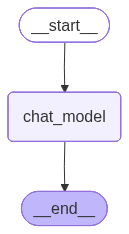

In [30]:
from langchain_core.messages import trim_messages

# Node
def chat_model_node(state: MessagesState):
    messages = trim_messages(
            state["messages"],
            max_tokens=100,
            strategy="last",
            token_counter=ChatGroq(model="openai/gpt-oss-20b"),
            allow_partial=False,
        )
    return {"messages": [llm.invoke(messages)]}

# Build graph
builder = StateGraph(MessagesState)
builder.add_node("chat_model", chat_model_node)
builder.add_edge(START, "chat_model")
builder.add_edge("chat_model", END)
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [31]:
messages.append(output['messages'][-1])
messages.append(HumanMessage(f"I want to know which teams qualified for the world cup.", name="Rao")) # type: ignore

In [32]:
# Example of trimming messages
trim_messages(
            messages,
            max_tokens=100,
            strategy="last",
            token_counter=ChatGroq(model="openai/gpt-oss-20b"),
            allow_partial=False
        )

[HumanMessage(content='I want to know which teams qualified for the world cup.', additional_kwargs={}, response_metadata={}, name='Rao')]

In [33]:
messages_out_trim = graph.invoke({'messages': messages}) # type: ignore